In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
av = 15.753
asy = 17.804
ac = 0.7103
an = 23.69
data = pd.read_csv("Periodic_Table_of_Elements.csv") 

In [49]:
atom = data[['AtomicNumber','Element','Symbol','AtomicMass','NumberofNeutrons','NumberofProtons','NumberofElectrons']]
atom = atom.drop(0)
atom.head()

,AtomicNumber,Element,Symbol,AtomicMass,NumberofNeutrons,NumberofProtons,NumberofElectrons
1,2,Helium,He,4.002,2,2,2
2,3,Lithium,Li,6.941,4,3,3
3,4,Beryllium,Be,9.012,5,4,4
4,5,Boron,B,10.811,6,5,5
5,6,Carbon,C,12.011,6,6,6


In [50]:
kv = av*(atom['AtomicMass'])
atom['VolumeContribution'] = kv

ak = asy*(atom['AtomicMass']**(2/3))
atom['SurfaceContribution'] = ak

ke = ac*((atom['AtomicNumber']**2)/(atom['AtomicMass']**(1/3)))
atom['ElectrostatiContribution'] = ke

ka = an*(((atom['NumberofNeutrons']-atom['AtomicNumber'])**2)/atom['AtomicMass'])
atom['AsymetricContribution'] = ka

atom['AtomicMass'] = round(atom['AtomicMass'])

In [51]:
atom.head()

,AtomicNumber,Element,Symbol,AtomicMass,NumberofNeutrons,NumberofProtons,NumberofElectrons,VolumeContribution,SurfaceContribution,ElectrostatiContribution,AsymetricContribution
1,2,Helium,He,4.0,2,2,2,63.043506,44.878222,1.789546,0.000000
2,3,Lithium,Li,7.0,4,3,3,109.341573,64.783680,3.351277,3.413053
3,4,Beryllium,Be,9.0,5,4,4,141.966036,77.101893,5.461200,2.628717
4,5,Boron,B,11.0,6,5,5,170.305683,87.048541,8.030820,2.191287
5,6,Carbon,C,12.0,6,6,6,189.209283,93.376379,11.165665,0.000000


In [52]:
atom.loc[atom['AtomicMass']%2!=0, 'Pairing'] = 0
atom.loc[(atom['AtomicMass']%2==0) & (atom['AtomicNumber']%2==0), 'Pairing'] = 33.4*(atom['AtomicMass']**(-3/4))
atom.loc[(atom['AtomicMass']%2==0) & (atom['AtomicNumber']%2!=0), 'Pairing'] = -33.4*(atom['AtomicMass']**(-3/4))

In [41]:
atom.head(10)

,AtomicNumber,Element,Symbol,AtomicMass,NumberofNeutrons,NumberofProtons,NumberofElectrons,VolumeContribution,SurfaceContribution,ElectrostatiContribution,AsymetricContribution,Pairing
1,2,Helium,He,4.0,2,2,2,63.043506,44.878222,1.789546,0.000000,11.808683
2,3,Lithium,Li,7.0,4,3,3,109.341573,64.783680,3.351277,3.413053,0.000000
3,4,Beryllium,Be,9.0,5,4,4,141.966036,77.101893,5.461200,2.628717,0.000000
4,5,Boron,B,11.0,6,5,5,170.305683,87.048541,8.030820,2.191287,0.000000
5,6,Carbon,C,12.0,6,6,6,189.209283,93.376379,11.165665,0.000000,5.180367
6,7,Nitrogen,N,14.0,7,7,7,220.652271,103.454092,14.438526,0.000000,-4.614774
7,8,Oxygen,O,16.0,8,8,8,252.032247,113.043643,18.040871,0.000000,4.175000
8,9,Fluorine,F,19.0,10,9,9,299.275494,126.762124,21.562091,1.246973,0.000000
9,10,Neon,Ne,20.0,10,10,10,317.895540,131.966904,26.089640,0.000000,3.531620
10,11,Sodium,Na,23.0,12,11,11,362.161470,143.949524,30.226013,1.030448,0.000000


In [42]:
BAZ= (atom['VolumeContribution'])-(atom['SurfaceContribution'])-(atom['ElectrostatiContribution'])-(atom['AsymetricContribution'])+(atom['Pairing'])
atom['Binding Energy']=BAZ

BAZA = atom['Binding Energy']/atom['AtomicMass']
atom['BAZA']=BAZA

In [43]:
atom.head(10)

,AtomicNumber,Element,Symbol,AtomicMass,NumberofNeutrons,NumberofProtons,NumberofElectrons,VolumeContribution,SurfaceContribution,ElectrostatiContribution,AsymetricContribution,Pairing,Binding Energy,BAZA
1,2,Helium,He,4.0,2,2,2,63.043506,44.878222,1.789546,0.000000,11.808683,28.184422,7.046105
2,3,Lithium,Li,7.0,4,3,3,109.341573,64.783680,3.351277,3.413053,0.000000,37.793563,5.399080
3,4,Beryllium,Be,9.0,5,4,4,141.966036,77.101893,5.461200,2.628717,0.000000,56.774226,6.308247
4,5,Boron,B,11.0,6,5,5,170.305683,87.048541,8.030820,2.191287,0.000000,73.035036,6.639549
5,6,Carbon,C,12.0,6,6,6,189.209283,93.376379,11.165665,0.000000,5.180367,89.847606,7.487300
6,7,Nitrogen,N,14.0,7,7,7,220.652271,103.454092,14.438526,0.000000,-4.614774,98.144880,7.010349
7,8,Oxygen,O,16.0,8,8,8,252.032247,113.043643,18.040871,0.000000,4.175000,125.122733,7.820171
8,9,Fluorine,F,19.0,10,9,9,299.275494,126.762124,21.562091,1.246973,0.000000,149.704306,7.879174
9,10,Neon,Ne,20.0,10,10,10,317.895540,131.966904,26.089640,0.000000,3.531620,163.370616,8.168531
10,11,Sodium,Na,23.0,12,11,11,362.161470,143.949524,30.226013,1.030448,0.000000,186.955485,8.128499


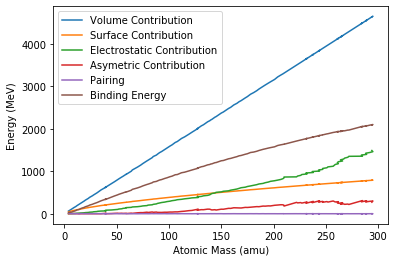

In [44]:
plt.plot(atom['AtomicMass'],atom['VolumeContribution'])
plt.plot(atom['AtomicMass'],atom['SurfaceContribution'])
plt.plot(atom['AtomicMass'],atom['ElectrostatiContribution'])
plt.plot(atom['AtomicMass'],atom['AsymetricContribution'])
plt.plot(atom['AtomicMass'],atom['Pairing'])
plt.plot(atom['AtomicMass'],atom['Binding Energy'])

plt.xlabel("Atomic Mass (amu)")
plt.ylabel("Energy (MeV)")
plt.gca().legend(("Volume Contribution","Surface Contribution",'Electrostatic Contribution','Asymetric Contribution','Pairing','Binding Energy'))

Text(0, 0.5, 'Binding Energy per Nucleon (MeV)')

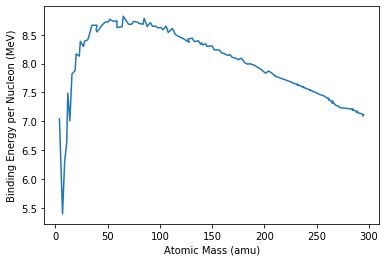

In [45]:
plt.plot(atom['AtomicMass'],atom['BAZA'])
plt.xlabel("Atomic Mass (amu)")
plt.ylabel("Binding Energy per Nucleon (MeV)")

In [46]:
x = atom['BAZA'].idxmax()
atom.loc[x , 'Element']

'Zinc'